<a href="https://colab.research.google.com/github/hussain0048/Predict-assigment-submission-using-Deep-learning-/blob/master/PredictNextAssigment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ================references==================================================================
#https://datascience.stackexchange.com/questions/16728/could-not-convert-string-to-float-error-on-kddcup99-dataset
#https://machinelearningmastery.com/machine-learning-in-python-step-by-step/
# ======================================Importing Needed Packages ===============================
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import pandas as pd
import os
import scipy
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import preprocessing
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [3]:
#========================================= Upload dataset ==========================================
from google.colab import files # Please First run this cod in chrom 
def getLocalFiles():
    _files = files.upload() # upload StudentNextSessionf.csv datase
    if len(_files) >0: # Then run above  libray 
       for k,v in _files.items():
         open(k,'wb').write(v)
getLocalFiles()

Saving StudentNextSessionf.csv to StudentNextSessionf.csv


In [0]:
# =============================================Read the data=====================================
col_names = ['Student ID', 'final_result','num_of_prev_attempts','highest_education','Region','disability','studied_credits','score','sum_click','Assigmnet_submittion']
df = pd.read_csv("StudentNextSessionf.csv",header=None, names=col_names)


In [0]:
# Create own index 
cols = [1]
#index = df[df.columns[cols]]
index = df[["Student ID"]]


In [0]:
#https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
#Using Pearson Correlation
plt.figure(figsize=(11,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
print(cor)

In [0]:
#====================================================== is dataset have null=====================
df.isnull()
df.isnull().sum()


In [0]:
# Dimensions of Dataset
print(df.shape)

In [0]:
# ======================================================take a look at the dataset===============
df.head(10) # we will see first 10 row of the dataset

In [0]:
#========================================================= Data Exploration=====================
# summarize the data
df.describe()

In [0]:
# ==================Class Distribution===========
print(df.groupby('Submitted').size())

In [0]:


# box and whisker plots
# histograms
X.hist()
plt.show()

In [0]:
# scatter plot matrix
scatter_matrix(X)
plt.show()

In [0]:
#===============================Preprocessing =================================================
#https://www.datacamp.com/courses/preprocessing-for-machine-learning-in-python
#https://www.geeksforgeeks.org/data-preprocessing-machine-learning-python/
#https://towardsdatascience.com/introduction-to-data-preprocessing-in-machine-learning-a9fa83a5dc9d
#https://machinelearningmastery.com/prepare-data-machine-learning-python-scikit-learn/
#https://medium.com/data-py-blog/data-preprocessing-for-python-2ab52cbc0edd
#https://medium.com/datadriveninvestor/data-preprocessing-for-machine-learning-188e9eef1d2c

# 1) Split Data into X and Y
feature_cols = ['Student ID', 'final_result','num_of_prev_attempts', 'highest_education','Region','disability','studied_credits','score','sum_click']

X = df[feature_cols] # Features
Y = df.Assigmnet_submittion # Target variable
#Y= df.iloc[:,12].values
#X= df.iloc[:0:12].values





In [0]:
# 2)Encoding categorical data
#https://discuss.analyticsvidhya.com/t/error-could-not-convert-string-to-float-while-running-randomforest-model-in-python/4855/2


#labelencoder_X = LabelEncoder()
#Y[:] = labelencoder_X.fit_transform(Y[:])
#X[:,1] = labelencoder_X.fit_transform(X[:,1])
#['Student ID', 'final_result','num_of_prev_attempts','Age ','highest_education','Region','disability','studied_credits','score','sum_click']

def convert(data):
    number = preprocessing.LabelEncoder()
    data['final_result'] = number.fit_transform(data.final_result)
    data['score'] = number.fit_transform(data.score)
    data['sum_click'] = number.fit_transform(data.score)
    data['num_of_prev_attempts'] = number.fit_transform(data.num_of_prev_attempts)
    #data['Age'] = number.fit_transform(data.Age)
    data['highest_education'] = number.fit_transform(data.highest_education)
    data['Region'] = number.fit_transform(data.Region)
    data['disability'] = number.fit_transform(data.disability)
    data['studied_credits'] = number.fit_transform(data.studied_credits)
    
    data=data.fillna(-999)
    return data
  
X=convert(X)

In [0]:
# Let select some features to explore more
cdf = df[['Student ID','highest_education','final_result','Assigmnet_submittion']]
#cdf.head(9)

In [0]:
# We can plot each of these features 
viz = df[['Student ID','highest_education','final_result','Assigmnet_submittion']]
viz.hist()
plt.show()


In [0]:
#========================Data exploration===========================
def plot_features_distribution(features, title,isLog=False):
    plt.figure(figsize=(12,6))
    plt.title(title)
    for feature in features:
        if(isLog):
            sns.distplot(np.log1p(df[feature]),kde=True,hist=False, bins=120, label=feature)
        else:
            sns.distplot(df[feature],kde=True,hist=False, bins=120, label=feature)
    plt.xlabel('')
    plt.legend()
    plt.show()

In [0]:
def plot_count(feature, title,size=1,df=df):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:30], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()   
    

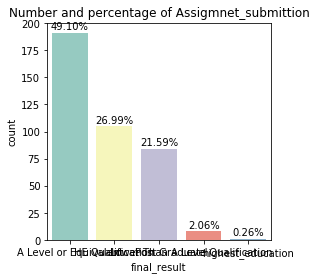

In [18]:
plot_count('final_result','Assigmnet_submittion')

In [0]:
# =========Split dataset into training set and test set==========
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1) # 70% training and 30% test



In [0]:
# ==================Feature Scaling==========================================================

#=============================================================================================
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [0]:
#=====================Build Models=========================================================



# 1) Decision Tree Model=================
#https://www.datacamp.com/community/tutorials/decision-tree-classification-python

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print(y_pred)



ValueError: ignored

In [0]:
# 2)  Logistic regression 
#https://www.marktechpost.com/2019/06/12/logistic-regression-with-a-real-world-example-in-python/?fbclid=IwAR31FyvXdFxxWam-n6lCKmsBxA7m_MIHdrhwerqpqow1-V9dx2ZeQ_gq-s0
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(y_pred)

In [0]:
# 3) RandomForestClassifier================
#https://www.kaggle.com/willkoehrsen/visualize-a-decision-tree-w-python-scikit-learn
#https://www.kaggle.com/willkoehrsen/visualize-a-decision-tree-w-python-scikit-learn
# Limit max depth
model = RandomForestClassifier(max_depth = 3, n_estimators=10)
# Train
model.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = model.predict(X_test)
# Extract single tree
estimator_limited = model.estimators_[5]
estimator_limited
# No max depth
model = RandomForestClassifier(max_depth = None, n_estimators=10)
model.fit(X_train, y_train)
estimator_nonlimited = model.estimators_[5]

# plot DT 

#Export Tree as .dot File
export_graphviz(estimator_limited, out_file='tree_limited.dot', feature_names = feature_cols,
                class_names = Y,
                rounded = True, proportion = False, precision = 2, filled = True)


In [0]:
export_graphviz(estimator_nonlimited, out_file='tree_nonlimited.dot', feature_names = feature_cols,
                class_names = Y,
                rounded = True, proportion = False, precision = 2, filled = True)



In [0]:
from sklearn.tree import export_graphviz
export_graphviz(estimator_limited, out_file='tree_limited.dot', feature_names = feature_cols,
                class_names = Y,
                rounded = True, proportion = False, precision = 2, filled = True)
export_graphviz(estimator_nonlimited, out_file='tree_nonlimited.dot', feature_names = feature_cols,
                class_names = Y,
                rounded = True, proportion = False, precision = 2, filled = True)

In [13]:
#Convert to png from the command line
!dot -Tpng tree_limited.dot -o tree_limited.png -Gdpi=600


Error: dot: can't open tree_limited.dot


In [0]:
from IPython.display import Image
Image(filename = 'tree_limited.png')

In [0]:
#=========================Evaluating Model=================================

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [0]:
# Making the Confusion Matrix
# https://www.marktechpost.com/2019/06/12/logistic-regression-with-a-real-world-example-in-python/?fbclid=IwAR31FyvXdFxxWam-n6lCKmsBxA7m_MIHdrhwerqpqow1-V9dx2ZeQ_gq-s0
# https://www.geeksforgeeks.org/confusion-matrix-machine-learning/
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(y_test.size)

ACC=( cm[0][0] + cm[1][1] ) / ( 117 )
print('Accuracy',ACC)

print('Accuracy Score :',accuracy_score(y_test, y_pred)) 
print('Report : ', classification_report(y_test, y_pred)) 

In [0]:
# Visualizing Decision Trees

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['Not-submitted','Submitted'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())